In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#from lmfit import Parameters, Minimizer, minimize, report_fit

import scqubits as scq

In [25]:
osc = scq.Oscillator(E_osc = 1)
gq = scq.GenericQubit(E = 1)

g = 0.1
hilbertspace = scq.HilbertSpace([gq, osc])

hilbertspace.add_interaction(
    g_strength = g,
    op1 = osc.annihilation_operator,
    op2 = gq.sp_operator,
    add_hc = True
)

In [26]:
print(hilbertspace)

HilbertSpace:  subsystems
-------------------------

GenericQubit--------|
                    | E: 1
                    |
                    | dim: 2


Oscillator----------|
                    | E_osc: 1
                    | l_osc: None
                    | truncated_dim: 6
                    |
                    | dim: 6



HilbertSpace:  interaction terms
--------------------------------

InteractionTerm----------|
                         | g_strength: 0.1
                         | operator_list: [(1, array([[0.        , 1.        , 0.        , 0 ...
                         | add_hc: True




In [27]:
dressed_hamiltonian = hilbertspace.hamiltonian()
dressed_hamiltonian

Quantum object: dims = [[2, 6], [2, 6]], shape = (12, 12), type = oper, isherm = True
Qobj data =
[[-0.5         0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.          0.
   0.1         0.          0.          0.          0.          0.        ]
 [ 0.          0.          1.5         0.          0.          0.
   0.          0.14142136  0.          0.          0.          0.        ]
 [ 0.          0.          0.          2.5         0.          0.
   0.          0.          0.17320508  0.          0.          0.        ]
 [ 0.          0.          0.          0.          3.5         0.
   0.          0.          0.          0.2         0.          0.        ]
 [ 0.          0.          0.          0.          0.          4.5
   0.          0.          0.          0.          0.2236068   0.        ]
 [ 0.          0.1         0.          0.          0.  

In [28]:
evals, evecs = hilbertspace.eigensys(evals_count=12)
print(evals, evecs)

[-0.5         0.4         0.6         1.35857864  1.64142136  2.32679492
  2.67320508  3.3         3.7         4.2763932   4.7236068   5.5       ] [Quantum object: dims = [[2, 6], [1, 1]], shape = (12, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
 Quantum object: dims = [[2, 6], [1, 1]], shape = (12, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
 Quantum object: dims = [[2, 6], [1, 1]], shape = (12, 1), type = ket
Qobj data =
[[ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]]
 Quantum object: dims = [[2, 6], [1, 1]], shape = (12, 1), type = ket
Qobj data =
[[ 0.        ]
 [ 0.        ]
 [-0.70710678]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]


In [29]:
pname1 = 'E'
E_vals = np.linspace(0.0, 10.0, 200)
pname2 = 'E_osc'
E_osc_vals = np.linspace(0.0, 10.0, 200)

paramvals_by_name = {pname1: E_vals, pname2: E_osc_vals}

def update_hilbertspace(E, E_osc):
    gq.E = E
    osc.E_osc = E_osc
    
sweep = scq.ParameterSweep(
    hilbertspace=hilbertspace,
    paramvals_by_name=paramvals_by_name,
    update_hilbertspace=update_hilbertspace,
    evals_count=12,
    num_cpus=4
)

Parallel compute bare eigensys [num_cpus=4]

Parallel compute bare eigensys [num_cpus=4]

Parallel compute dressed eigensys [num_cpus=4]

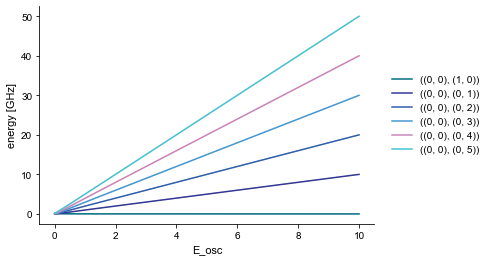

In [30]:
sweep["E":0.0].plot_transitions();

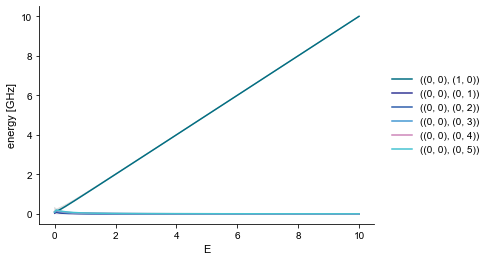

In [31]:
sweep["E_osc":0.0].plot_transitions();